In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [2]:
!pip install -q roboflow
!pip install -q supervision
!pip install -q pyyaml
!pip install onemetric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.

In [3]:
from google.colab import drive # подключаем гугл драйв диск для загрузки файлов
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [18]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Загрузка датасета с MyDrive ! cn=10 но, метки 0, 2, 5
%cd {HOME}

!mkdir -p /content/datasets
!cp -r /content/drive/MyDrive/Стажировка/Helmets_rdy/* /content/datasets

In [ ]:
# Для для варианта с MyDrive

import yaml
# Читаем YAML в словарь
with open('/content/datasets/data.yaml') as fh:
    yaml_dict_data = yaml.safe_load(fh)

In [ ]:
# Для датасета перенесенного с MyDrive
LOCATION = '/content/datasets'
print("location:", LOCATION)
CLASSES = sorted(yaml_dict_data.get('names'))
print("classes:", CLASSES)

location: /content/datasets
classes: ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']


In [4]:
# Загрузка датасета с Roboflow
%cd {HOME}

import roboflow
from roboflow import Roboflow

rf = Roboflow(api_key='zkBUPh2jfwTn9Jl7nC8E')
project = rf.workspace().project('helmets-on-persons-heads-cn3')
dataset = project.version(1).download("yolov8")

[Errno 2] No such file or directory: '{HOME}'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Helmets-on-persons-heads-cn3-1 in yolov8:: 100%|██████████| 9970/9970 [00:02<00:00, 4397.46it/s]


In [5]:
# Для датасета с Roboflow
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /content/Helmets-on-persons-heads-cn3-1
classes: ['Hardhat', 'NO-Hardhat', 'Person']


In [ ]:
# Дообучение, поправить пути в yaml для Roboflow, нужно вида ../test/images
last_model = YOLO("/content/drive/MyDrive/Стажировка/weights/last.pt")
# так работает
last_model.resume = True

results = last_model.train(
   data=f'{LOCATION}/data.yaml',
   imgsz=640,
   epochs=2,
   batch=8,
   name='yolov8s_v2_120plus')

In [ ]:
# Загрузка новой модели
model = YOLO('yolov8s.pt')

# Обучение
results = model.train(
   data='/content/datasets/data.yaml',
   imgsz=640,
   epochs=100,
   batch=8,
   name='yolov8s_v1_100e'
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 159MB/s] 


Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_v1_100e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 3992 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3992/3992 [00:02<00:00, 1895.07it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/valid/labels... 499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<00:00, 704.98it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/yolov8s_v1_100e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_v1_100e
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.15G      1.173      1.439      1.073         54        640: 100%|██████████| 499/499 [02:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.38it/s]

                   all        499       1968      0.794      0.773      0.824      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.23G      1.156     0.8215      1.062         29        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.07it/s]

                   all        499       1968      0.832      0.786      0.847      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.24G      1.166     0.8013      1.063         45        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.94it/s]

                   all        499       1968      0.869      0.771      0.851      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.22G      1.148     0.7743      1.054         30        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all        499       1968      0.864      0.799      0.855      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.24G      1.111     0.7295      1.039         39        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]

                   all        499       1968      0.876      0.796      0.869      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.24G      1.086      0.704      1.028         38        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.05it/s]

                   all        499       1968      0.872      0.829      0.887      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.22G      1.071     0.6816      1.017         40        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.33it/s]

                   all        499       1968        0.9      0.828      0.889      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.23G      1.043     0.6624      1.013         44        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                   all        499       1968      0.903      0.821      0.887       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G      1.038     0.6515      1.009         31        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]

                   all        499       1968      0.902      0.823      0.897      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.22G      1.024     0.6376      1.008         38        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        499       1968      0.897      0.849      0.903      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.23G      1.014     0.6304      1.002         18        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.60it/s]

                   all        499       1968      0.907      0.847      0.904      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.22G     0.9973     0.6181     0.9935         30        640: 100%|██████████| 499/499 [01:55<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.73it/s]

                   all        499       1968      0.907      0.862       0.91      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.23G     0.9907     0.6082     0.9909         46        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all        499       1968      0.912      0.865      0.909       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.23G     0.9852     0.5938     0.9837         41        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.914       0.84      0.906       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.23G     0.9834     0.5929     0.9815         68        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.58it/s]

                   all        499       1968      0.922      0.854      0.913      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.23G     0.9596     0.5829     0.9787         21        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]

                   all        499       1968       0.91      0.869      0.914      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.24G     0.9565     0.5747     0.9805         57        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.01it/s]

                   all        499       1968      0.909      0.864       0.91      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.22G       0.96     0.5735     0.9762         41        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.97it/s]

                   all        499       1968      0.923      0.854      0.914      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.23G     0.9394     0.5586     0.9717         42        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.53it/s]

                   all        499       1968      0.906      0.856      0.914      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.22G     0.9275     0.5526     0.9661         40        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]

                   all        499       1968       0.91      0.877      0.928      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.22G     0.9328     0.5482     0.9703         59        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.922      0.879      0.931      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G     0.9142     0.5368     0.9601         35        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]

                   all        499       1968      0.927      0.873       0.93       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.23G      0.912     0.5368      0.964         33        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.932      0.876       0.93       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.23G     0.9177      0.538      0.962         34        640: 100%|██████████| 499/499 [02:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.36it/s]

                   all        499       1968      0.927       0.88      0.926      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.22G     0.9087     0.5378     0.9611         33        640: 100%|██████████| 499/499 [02:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]

                   all        499       1968      0.929      0.878       0.93      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.22G     0.9041     0.5295     0.9583         34        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.943      0.876      0.936      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.23G     0.8934     0.5237     0.9563         48        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.88it/s]

                   all        499       1968      0.928      0.891      0.935      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.24G     0.8962     0.5191      0.956         45        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.13it/s]

                   all        499       1968      0.933      0.878      0.928      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.23G      0.879     0.5122     0.9485         50        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.14it/s]

                   all        499       1968      0.923      0.877      0.932      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.22G     0.8794     0.5112     0.9495         35        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.52it/s]

                   all        499       1968      0.914       0.88      0.929      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.24G     0.8813     0.5147     0.9473         28        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.48it/s]

                   all        499       1968      0.936      0.883      0.939      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.22G     0.8708     0.5042     0.9419         43        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.61it/s]

                   all        499       1968      0.928       0.88      0.934      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.23G     0.8645     0.4937     0.9406         38        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.38it/s]

                   all        499       1968      0.929      0.883      0.933      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.24G     0.8612     0.4928     0.9416         24        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        499       1968      0.925       0.89       0.94      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.23G     0.8534     0.4878     0.9374         38        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        499       1968      0.933      0.881      0.933      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G     0.8577     0.4919     0.9433         47        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.00it/s]

                   all        499       1968      0.942      0.888      0.941      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G     0.8552     0.4883     0.9412         65        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.13it/s]


                   all        499       1968      0.928      0.889      0.939      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.22G     0.8454     0.4821      0.935         53        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.91it/s]

                   all        499       1968      0.945      0.881      0.941      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.23G      0.848     0.4878     0.9392         66        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.26it/s]

                   all        499       1968      0.932      0.881      0.936      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.23G     0.8462     0.4843     0.9342         45        640: 100%|██████████| 499/499 [01:56<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                   all        499       1968      0.941       0.89      0.938      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.23G     0.8374     0.4761     0.9352         58        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.932      0.897      0.941      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.22G     0.8294     0.4731     0.9321         43        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]

                   all        499       1968      0.944      0.888      0.942      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.22G     0.8253     0.4653     0.9264         42        640: 100%|██████████| 499/499 [01:52<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        499       1968      0.949      0.901      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.23G     0.8236     0.4674     0.9311         21        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.12it/s]

                   all        499       1968      0.938      0.903      0.947      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.23G      0.822     0.4651     0.9297         38        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.52it/s]

                   all        499       1968      0.933      0.904      0.947      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.24G     0.8155     0.4591     0.9254         58        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.78it/s]

                   all        499       1968      0.935      0.891      0.944      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G     0.8189     0.4598     0.9296         36        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.11it/s]

                   all        499       1968      0.938      0.909      0.951      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.22G     0.8109     0.4599     0.9246         35        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]

                   all        499       1968      0.932      0.907      0.949      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.22G     0.7979     0.4529     0.9207         27        640: 100%|██████████| 499/499 [01:58<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.938      0.909      0.951       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.24G     0.7972     0.4514     0.9186         45        640: 100%|██████████| 499/499 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all        499       1968      0.944      0.902      0.948      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.25G     0.7985     0.4461     0.9189         51        640: 100%|██████████| 499/499 [01:59<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.939      0.914      0.954      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.26G     0.7966     0.4427     0.9195         39        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.06it/s]

                   all        499       1968      0.924      0.908      0.947      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.23G     0.7942     0.4431     0.9149         36        640: 100%|██████████| 499/499 [01:58<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all        499       1968      0.937      0.904      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.22G     0.7897      0.441      0.913         65        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        499       1968      0.933      0.911       0.95      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.21G     0.7821      0.435     0.9144         53        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all        499       1968      0.946      0.893      0.944        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.22G     0.7837     0.4379     0.9174         24        640: 100%|██████████| 499/499 [01:55<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.51it/s]

                   all        499       1968      0.946      0.906      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.23G     0.7696     0.4305      0.912         50        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]

                   all        499       1968      0.939      0.911      0.953      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.7746     0.4324     0.9097         39        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        499       1968      0.938      0.915       0.95      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.24G      0.765     0.4291     0.9079         31        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all        499       1968      0.938      0.914      0.954      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.25G       0.76     0.4288     0.9102         61        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                   all        499       1968       0.94      0.913      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.22G     0.7621     0.4259     0.9073         52        640: 100%|██████████| 499/499 [01:59<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        499       1968      0.945      0.912      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.24G     0.7566     0.4231     0.9098         47        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.54it/s]

                   all        499       1968       0.95      0.905      0.949      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.27G     0.7629     0.4229     0.9076         47        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]

                   all        499       1968       0.95       0.91      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.22G     0.7553     0.4233     0.9102         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.29it/s]

                   all        499       1968      0.939      0.915      0.957      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.23G     0.7538     0.4216     0.9088         53        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.98it/s]


                   all        499       1968      0.943      0.909      0.955      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.24G     0.7481     0.4188     0.9022         55        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.33it/s]

                   all        499       1968      0.931       0.91       0.95      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.23G     0.7444     0.4115     0.9037         41        640: 100%|██████████| 499/499 [01:59<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.31it/s]

                   all        499       1968      0.947      0.904      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.24G     0.7396     0.4108     0.9043         40        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]

                   all        499       1968      0.943      0.912      0.954      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.22G     0.7334      0.407     0.8991         25        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all        499       1968      0.953      0.904       0.95      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.24G     0.7373     0.4086     0.8992         56        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.68it/s]

                   all        499       1968      0.945      0.915      0.953      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.23G     0.7244      0.405     0.8989         24        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.39it/s]

                   all        499       1968      0.951      0.908      0.954      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.22G     0.7262     0.4008     0.9011         47        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.70it/s]

                   all        499       1968      0.949       0.91      0.951       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.23G     0.7249      0.403     0.8968         43        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]

                   all        499       1968      0.947      0.917      0.955      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.23G     0.7234      0.399     0.8982         20        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        499       1968      0.946      0.919      0.958      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.23G     0.7212     0.3965     0.8984         30        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]

                   all        499       1968       0.95       0.91      0.953      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.24G     0.7243     0.3962     0.8967         34        640: 100%|██████████| 499/499 [01:58<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.84it/s]

                   all        499       1968       0.94       0.92      0.955      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.23G      0.711     0.3934     0.8949         22        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.42it/s]

                   all        499       1968      0.946      0.912      0.952      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.23G     0.7123     0.3909     0.8951         35        640: 100%|██████████| 499/499 [02:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]

                   all        499       1968       0.95      0.916      0.956      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.23G     0.7063     0.3897     0.8924         62        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.947       0.92      0.956      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.24G     0.7077     0.3867     0.8918         36        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]

                   all        499       1968      0.945      0.919      0.959      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.23G     0.7056     0.3862     0.8917         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        499       1968       0.95      0.918      0.955      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.22G      0.698     0.3855     0.8896         58        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.88it/s]

                   all        499       1968      0.958      0.917      0.958      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G     0.6957     0.3794     0.8874         31        640: 100%|██████████| 499/499 [01:57<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.86it/s]

                   all        499       1968      0.951      0.921       0.96      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.22G     0.6918     0.3788     0.8881         55        640: 100%|██████████| 499/499 [01:56<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]

                   all        499       1968      0.947      0.927       0.96      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.24G     0.6931     0.3793     0.8895         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]

                   all        499       1968      0.953      0.917      0.957      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.22G     0.6842     0.3733     0.8887         53        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        499       1968      0.955      0.921      0.959      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.24G     0.6844     0.3762      0.888         23        640: 100%|██████████| 499/499 [01:58<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.949      0.919      0.958       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.23G     0.6858     0.3745     0.8841         34        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.955      0.915      0.956      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.23G     0.6818     0.3695     0.8864         44        640: 100%|██████████| 499/499 [02:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.34it/s]

                   all        499       1968       0.95      0.918      0.955      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G     0.6753       0.37     0.8824         40        640: 100%|██████████| 499/499 [02:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.45it/s]

                   all        499       1968       0.95      0.919      0.956      0.732


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.23G     0.6368     0.3381     0.8735         20        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.96it/s]

                   all        499       1968      0.951      0.919      0.958      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.23G     0.6244     0.3315     0.8656         27        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        499       1968      0.945      0.923      0.961       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G     0.6198     0.3279     0.8642         31        640: 100%|██████████| 499/499 [01:52<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all        499       1968      0.945      0.918       0.96      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.23G     0.6177     0.3256     0.8613         28        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all        499       1968      0.954      0.916      0.959      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.23G     0.6169     0.3237     0.8647         28        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.951      0.919      0.957      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.23G     0.6134     0.3214     0.8649         22        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.26it/s]

                   all        499       1968       0.95      0.924      0.959      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.23G     0.6102     0.3205     0.8599         40        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.33it/s]

                   all        499       1968      0.954      0.924       0.96      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.23G     0.6067     0.3195     0.8623         31        640: 100%|██████████| 499/499 [01:51<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]

                   all        499       1968      0.952      0.923       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.25G     0.5992      0.318     0.8605         21        640: 100%|██████████| 499/499 [01:51<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all        499       1968       0.95      0.925       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.23G     0.6039     0.3165     0.8595         40        640: 100%|██████████| 499/499 [01:52<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.949      0.925       0.96      0.735



100 epochs completed in 3.462 hours.
Optimizer stripped from runs/detect/yolov8s_v1_100e/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_v1_100e/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_v1_100e/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]


                   all        499       1968      0.949      0.924      0.958      0.736
               Hardhat        499        509      0.945      0.929      0.957      0.734
            NO-Hardhat        499        518      0.948      0.894      0.942      0.628
                Person        499        941      0.954      0.949      0.976      0.845
Speed: 0.5ms preprocess, 5.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8s_v1_100e


In [ ]:
# Загрузка новой модели
model = YOLO('yolov8s.pt')

# Обучение
results = model.train(
   data='/content/datasets/data.yaml',
   imgsz=640,
   epochs=100,
   batch=8,
   name='yolov8s_v1_100e'
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 159MB/s] 


Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_v1_100e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 3992 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3992/3992 [00:02<00:00, 1895.07it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/valid/labels... 499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<00:00, 704.98it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/yolov8s_v1_100e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_v1_100e
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.15G      1.173      1.439      1.073         54        640: 100%|██████████| 499/499 [02:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.38it/s]

                   all        499       1968      0.794      0.773      0.824      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.23G      1.156     0.8215      1.062         29        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.07it/s]

                   all        499       1968      0.832      0.786      0.847      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.24G      1.166     0.8013      1.063         45        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.94it/s]

                   all        499       1968      0.869      0.771      0.851      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.22G      1.148     0.7743      1.054         30        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all        499       1968      0.864      0.799      0.855      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.24G      1.111     0.7295      1.039         39        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]

                   all        499       1968      0.876      0.796      0.869      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.24G      1.086      0.704      1.028         38        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.05it/s]

                   all        499       1968      0.872      0.829      0.887      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.22G      1.071     0.6816      1.017         40        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.33it/s]

                   all        499       1968        0.9      0.828      0.889      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.23G      1.043     0.6624      1.013         44        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                   all        499       1968      0.903      0.821      0.887       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G      1.038     0.6515      1.009         31        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]

                   all        499       1968      0.902      0.823      0.897      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.22G      1.024     0.6376      1.008         38        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        499       1968      0.897      0.849      0.903      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.23G      1.014     0.6304      1.002         18        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.60it/s]

                   all        499       1968      0.907      0.847      0.904      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.22G     0.9973     0.6181     0.9935         30        640: 100%|██████████| 499/499 [01:55<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.73it/s]

                   all        499       1968      0.907      0.862       0.91      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.23G     0.9907     0.6082     0.9909         46        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all        499       1968      0.912      0.865      0.909       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.23G     0.9852     0.5938     0.9837         41        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.914       0.84      0.906       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.23G     0.9834     0.5929     0.9815         68        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.58it/s]

                   all        499       1968      0.922      0.854      0.913      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.23G     0.9596     0.5829     0.9787         21        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]

                   all        499       1968       0.91      0.869      0.914      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.24G     0.9565     0.5747     0.9805         57        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.01it/s]

                   all        499       1968      0.909      0.864       0.91      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.22G       0.96     0.5735     0.9762         41        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.97it/s]

                   all        499       1968      0.923      0.854      0.914      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.23G     0.9394     0.5586     0.9717         42        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.53it/s]

                   all        499       1968      0.906      0.856      0.914      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.22G     0.9275     0.5526     0.9661         40        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]

                   all        499       1968       0.91      0.877      0.928      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.22G     0.9328     0.5482     0.9703         59        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.922      0.879      0.931      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G     0.9142     0.5368     0.9601         35        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]

                   all        499       1968      0.927      0.873       0.93       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.23G      0.912     0.5368      0.964         33        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.932      0.876       0.93       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.23G     0.9177      0.538      0.962         34        640: 100%|██████████| 499/499 [02:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.36it/s]

                   all        499       1968      0.927       0.88      0.926      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.22G     0.9087     0.5378     0.9611         33        640: 100%|██████████| 499/499 [02:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]

                   all        499       1968      0.929      0.878       0.93      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.22G     0.9041     0.5295     0.9583         34        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.943      0.876      0.936      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.23G     0.8934     0.5237     0.9563         48        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.88it/s]

                   all        499       1968      0.928      0.891      0.935      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.24G     0.8962     0.5191      0.956         45        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.13it/s]

                   all        499       1968      0.933      0.878      0.928      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.23G      0.879     0.5122     0.9485         50        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.14it/s]

                   all        499       1968      0.923      0.877      0.932      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.22G     0.8794     0.5112     0.9495         35        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.52it/s]

                   all        499       1968      0.914       0.88      0.929      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.24G     0.8813     0.5147     0.9473         28        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.48it/s]

                   all        499       1968      0.936      0.883      0.939      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.22G     0.8708     0.5042     0.9419         43        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.61it/s]

                   all        499       1968      0.928       0.88      0.934      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.23G     0.8645     0.4937     0.9406         38        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.38it/s]

                   all        499       1968      0.929      0.883      0.933      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.24G     0.8612     0.4928     0.9416         24        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        499       1968      0.925       0.89       0.94      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.23G     0.8534     0.4878     0.9374         38        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        499       1968      0.933      0.881      0.933      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G     0.8577     0.4919     0.9433         47        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.00it/s]

                   all        499       1968      0.942      0.888      0.941      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G     0.8552     0.4883     0.9412         65        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.13it/s]


                   all        499       1968      0.928      0.889      0.939      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.22G     0.8454     0.4821      0.935         53        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.91it/s]

                   all        499       1968      0.945      0.881      0.941      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.23G      0.848     0.4878     0.9392         66        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.26it/s]

                   all        499       1968      0.932      0.881      0.936      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.23G     0.8462     0.4843     0.9342         45        640: 100%|██████████| 499/499 [01:56<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                   all        499       1968      0.941       0.89      0.938      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.23G     0.8374     0.4761     0.9352         58        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.932      0.897      0.941      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.22G     0.8294     0.4731     0.9321         43        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]

                   all        499       1968      0.944      0.888      0.942      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.22G     0.8253     0.4653     0.9264         42        640: 100%|██████████| 499/499 [01:52<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        499       1968      0.949      0.901      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.23G     0.8236     0.4674     0.9311         21        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.12it/s]

                   all        499       1968      0.938      0.903      0.947      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.23G      0.822     0.4651     0.9297         38        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.52it/s]

                   all        499       1968      0.933      0.904      0.947      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.24G     0.8155     0.4591     0.9254         58        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.78it/s]

                   all        499       1968      0.935      0.891      0.944      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G     0.8189     0.4598     0.9296         36        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.11it/s]

                   all        499       1968      0.938      0.909      0.951      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.22G     0.8109     0.4599     0.9246         35        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]

                   all        499       1968      0.932      0.907      0.949      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.22G     0.7979     0.4529     0.9207         27        640: 100%|██████████| 499/499 [01:58<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.938      0.909      0.951       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.24G     0.7972     0.4514     0.9186         45        640: 100%|██████████| 499/499 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all        499       1968      0.944      0.902      0.948      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.25G     0.7985     0.4461     0.9189         51        640: 100%|██████████| 499/499 [01:59<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.939      0.914      0.954      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.26G     0.7966     0.4427     0.9195         39        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.06it/s]

                   all        499       1968      0.924      0.908      0.947      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.23G     0.7942     0.4431     0.9149         36        640: 100%|██████████| 499/499 [01:58<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all        499       1968      0.937      0.904      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.22G     0.7897      0.441      0.913         65        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        499       1968      0.933      0.911       0.95      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.21G     0.7821      0.435     0.9144         53        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all        499       1968      0.946      0.893      0.944        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.22G     0.7837     0.4379     0.9174         24        640: 100%|██████████| 499/499 [01:55<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.51it/s]

                   all        499       1968      0.946      0.906      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.23G     0.7696     0.4305      0.912         50        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]

                   all        499       1968      0.939      0.911      0.953      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.7746     0.4324     0.9097         39        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        499       1968      0.938      0.915       0.95      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.24G      0.765     0.4291     0.9079         31        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all        499       1968      0.938      0.914      0.954      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.25G       0.76     0.4288     0.9102         61        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]

                   all        499       1968       0.94      0.913      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.22G     0.7621     0.4259     0.9073         52        640: 100%|██████████| 499/499 [01:59<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        499       1968      0.945      0.912      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.24G     0.7566     0.4231     0.9098         47        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.54it/s]

                   all        499       1968       0.95      0.905      0.949      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.27G     0.7629     0.4229     0.9076         47        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]

                   all        499       1968       0.95       0.91      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.22G     0.7553     0.4233     0.9102         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.29it/s]

                   all        499       1968      0.939      0.915      0.957      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.23G     0.7538     0.4216     0.9088         53        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.98it/s]


                   all        499       1968      0.943      0.909      0.955      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.24G     0.7481     0.4188     0.9022         55        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.33it/s]

                   all        499       1968      0.931       0.91       0.95      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.23G     0.7444     0.4115     0.9037         41        640: 100%|██████████| 499/499 [01:59<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.31it/s]

                   all        499       1968      0.947      0.904      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.24G     0.7396     0.4108     0.9043         40        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]

                   all        499       1968      0.943      0.912      0.954      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.22G     0.7334      0.407     0.8991         25        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all        499       1968      0.953      0.904       0.95      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.24G     0.7373     0.4086     0.8992         56        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.68it/s]

                   all        499       1968      0.945      0.915      0.953      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.23G     0.7244      0.405     0.8989         24        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.39it/s]

                   all        499       1968      0.951      0.908      0.954      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.22G     0.7262     0.4008     0.9011         47        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.70it/s]

                   all        499       1968      0.949       0.91      0.951       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.23G     0.7249      0.403     0.8968         43        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]

                   all        499       1968      0.947      0.917      0.955      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.23G     0.7234      0.399     0.8982         20        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        499       1968      0.946      0.919      0.958      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.23G     0.7212     0.3965     0.8984         30        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]

                   all        499       1968       0.95       0.91      0.953      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.24G     0.7243     0.3962     0.8967         34        640: 100%|██████████| 499/499 [01:58<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.84it/s]

                   all        499       1968       0.94       0.92      0.955      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.23G      0.711     0.3934     0.8949         22        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.42it/s]

                   all        499       1968      0.946      0.912      0.952      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.23G     0.7123     0.3909     0.8951         35        640: 100%|██████████| 499/499 [02:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]

                   all        499       1968       0.95      0.916      0.956      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.23G     0.7063     0.3897     0.8924         62        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.947       0.92      0.956      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.24G     0.7077     0.3867     0.8918         36        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]

                   all        499       1968      0.945      0.919      0.959      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.23G     0.7056     0.3862     0.8917         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        499       1968       0.95      0.918      0.955      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.22G      0.698     0.3855     0.8896         58        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.88it/s]

                   all        499       1968      0.958      0.917      0.958      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G     0.6957     0.3794     0.8874         31        640: 100%|██████████| 499/499 [01:57<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.86it/s]

                   all        499       1968      0.951      0.921       0.96      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.22G     0.6918     0.3788     0.8881         55        640: 100%|██████████| 499/499 [01:56<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]

                   all        499       1968      0.947      0.927       0.96      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.24G     0.6931     0.3793     0.8895         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]

                   all        499       1968      0.953      0.917      0.957      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.22G     0.6842     0.3733     0.8887         53        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        499       1968      0.955      0.921      0.959      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.24G     0.6844     0.3762      0.888         23        640: 100%|██████████| 499/499 [01:58<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        499       1968      0.949      0.919      0.958       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.23G     0.6858     0.3745     0.8841         34        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]

                   all        499       1968      0.955      0.915      0.956      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.23G     0.6818     0.3695     0.8864         44        640: 100%|██████████| 499/499 [02:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.34it/s]

                   all        499       1968       0.95      0.918      0.955      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G     0.6753       0.37     0.8824         40        640: 100%|██████████| 499/499 [02:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.45it/s]

                   all        499       1968       0.95      0.919      0.956      0.732


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.23G     0.6368     0.3381     0.8735         20        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.96it/s]

                   all        499       1968      0.951      0.919      0.958      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.23G     0.6244     0.3315     0.8656         27        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        499       1968      0.945      0.923      0.961       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G     0.6198     0.3279     0.8642         31        640: 100%|██████████| 499/499 [01:52<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all        499       1968      0.945      0.918       0.96      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.23G     0.6177     0.3256     0.8613         28        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all        499       1968      0.954      0.916      0.959      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.23G     0.6169     0.3237     0.8647         28        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.951      0.919      0.957      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.23G     0.6134     0.3214     0.8649         22        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.26it/s]

                   all        499       1968       0.95      0.924      0.959      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.23G     0.6102     0.3205     0.8599         40        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.33it/s]

                   all        499       1968      0.954      0.924       0.96      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.23G     0.6067     0.3195     0.8623         31        640: 100%|██████████| 499/499 [01:51<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]

                   all        499       1968      0.952      0.923       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.25G     0.5992      0.318     0.8605         21        640: 100%|██████████| 499/499 [01:51<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all        499       1968       0.95      0.925       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.23G     0.6039     0.3165     0.8595         40        640: 100%|██████████| 499/499 [01:52<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.98it/s]

                   all        499       1968      0.949      0.925       0.96      0.735



100 epochs completed in 3.462 hours.
Optimizer stripped from runs/detect/yolov8s_v1_100e/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_v1_100e/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_v1_100e/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]


                   all        499       1968      0.949      0.924      0.958      0.736
               Hardhat        499        509      0.945      0.929      0.957      0.734
            NO-Hardhat        499        518      0.948      0.894      0.942      0.628
                Person        499        941      0.954      0.949      0.976      0.845
Speed: 0.5ms preprocess, 5.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8s_v1_100e


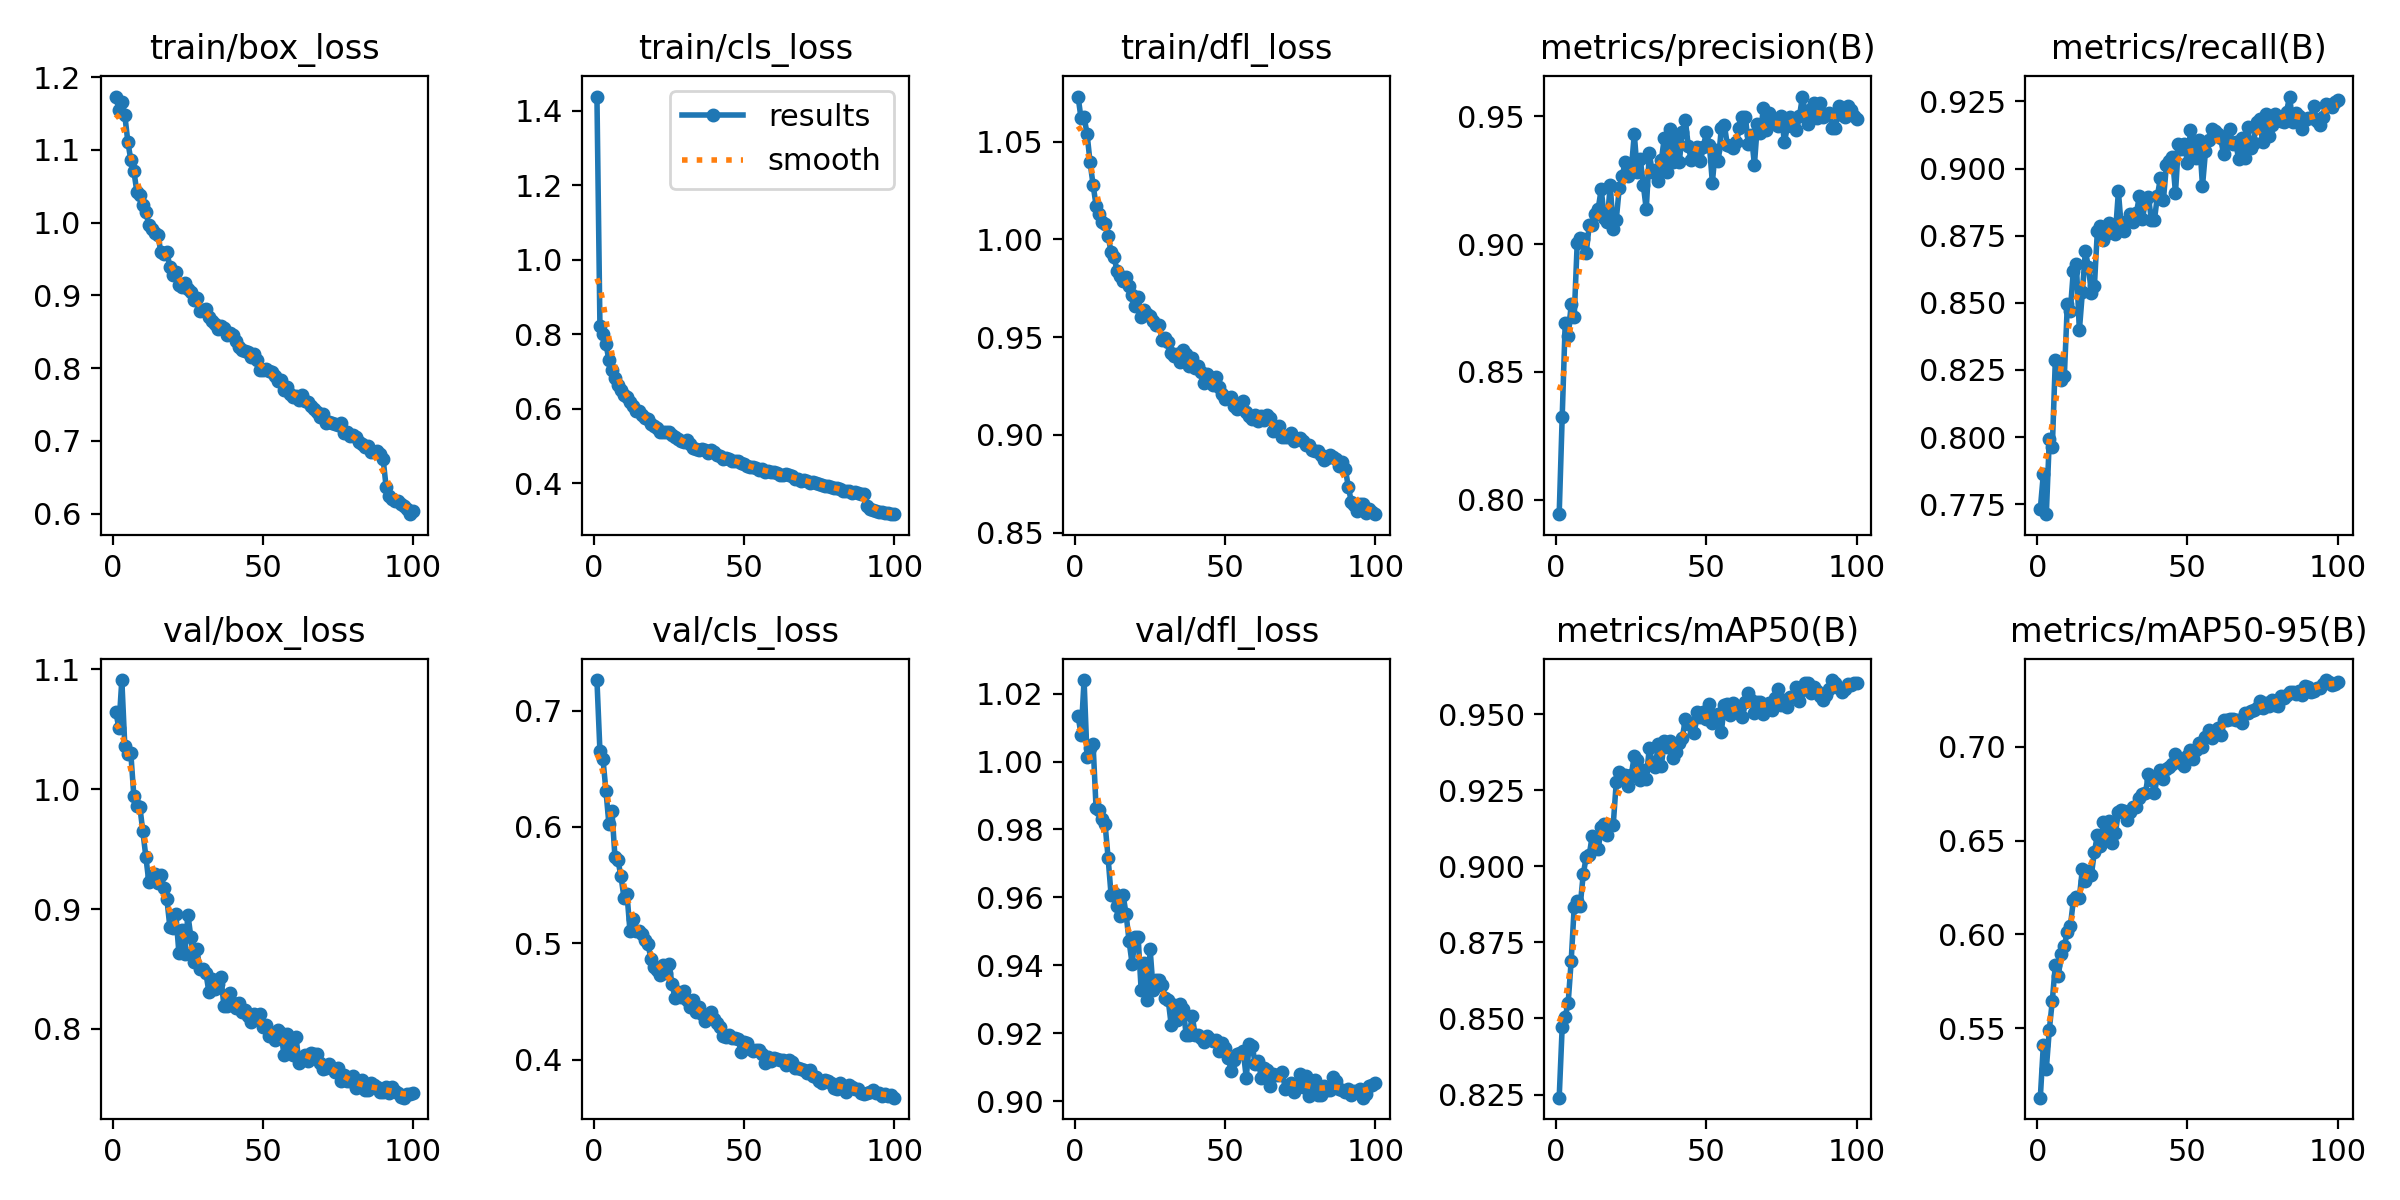

In [ ]:
# Load the model.
model = YOLO('yolov8s.pt')

# Training.
results = model.train(
   data='/content/datasets/data.yaml',
   imgsz=640,
   epochs=120,
   batch=8,
   name='yolov8s_v1_120e'
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 339MB/s]


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=120, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_v1_120e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

100%|██████████| 755k/755k [00:00<00:00, 110MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 299MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 3992 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3992/3992 [00:02<00:00, 1673.73it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/valid/labels... 499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<00:00, 960.53it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/yolov8s_v1_120e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_v1_120e
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      2.29G      1.174      1.442       1.07         54        640: 100%|██████████| 499/499 [02:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.86it/s]

                   all        499       1968      0.834      0.737      0.822      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      2.37G      1.155     0.8232      1.059         29        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.69it/s]


                   all        499       1968      0.859      0.784      0.849      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      2.36G      1.177      0.811      1.067         45        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]


                   all        499       1968      0.865      0.767      0.847      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      2.36G      1.151     0.7763      1.055         30        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]

                   all        499       1968       0.87      0.811      0.868      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      2.34G      1.114      0.724      1.041         39        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.41it/s]

                   all        499       1968      0.856      0.793      0.866      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      2.36G      1.088     0.7028      1.029         38        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.65it/s]


                   all        499       1968      0.875       0.83      0.891      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      2.36G      1.064     0.6726      1.013         40        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]

                   all        499       1968      0.878      0.822      0.887      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      2.37G      1.048     0.6564      1.012         44        640: 100%|██████████| 499/499 [01:51<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.85it/s]

                   all        499       1968      0.885      0.837      0.891      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      2.36G      1.036     0.6409      1.009         31        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]

                   all        499       1968        0.9      0.819      0.885      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      2.36G      1.018     0.6323      1.005         38        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.29it/s]

                   all        499       1968      0.896      0.852      0.901      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      2.35G      1.006     0.6176     0.9981         18        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.21it/s]

                   all        499       1968      0.892      0.834      0.896      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      2.36G     0.9947     0.6118     0.9924         30        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]

                   all        499       1968      0.898       0.84      0.901      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      2.36G     0.9809     0.6019     0.9905         46        640: 100%|██████████| 499/499 [01:52<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]

                   all        499       1968      0.925      0.855      0.912      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      2.37G     0.9819      0.593      0.986         41        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.44it/s]

                   all        499       1968      0.898      0.845      0.907      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      2.37G     0.9813     0.5883     0.9836         68        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.20it/s]

                   all        499       1968      0.917      0.842      0.912      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      2.37G      0.952     0.5696     0.9777         21        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.16it/s]

                   all        499       1968      0.922      0.851      0.917      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      2.36G     0.9552     0.5689     0.9825         57        640: 100%|██████████| 499/499 [01:55<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]

                   all        499       1968      0.919      0.855      0.914      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      2.36G     0.9529     0.5642      0.976         41        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]

                   all        499       1968      0.913      0.868       0.92      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      2.34G      0.941     0.5574     0.9753         42        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.77it/s]

                   all        499       1968      0.905      0.874      0.919       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      2.34G      0.923     0.5497     0.9656         40        640: 100%|██████████| 499/499 [01:59<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.46it/s]

                   all        499       1968      0.918      0.872      0.923      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      2.36G     0.9293     0.5379     0.9722         59        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]

                   all        499       1968      0.909      0.873      0.919      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      2.37G     0.9113     0.5358     0.9613         35        640: 100%|██████████| 499/499 [01:57<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.15it/s]

                   all        499       1968      0.925      0.876      0.924      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      2.34G     0.9116     0.5302     0.9641         33        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.59it/s]

                   all        499       1968      0.924      0.867      0.924      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      2.36G     0.9131     0.5304     0.9641         34        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.74it/s]

                   all        499       1968      0.929      0.873      0.926      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      2.36G     0.9035      0.533      0.963         33        640: 100%|██████████| 499/499 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]

                   all        499       1968       0.93      0.878      0.929      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      2.36G     0.9003     0.5283     0.9608         34        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.20it/s]

                   all        499       1968      0.921      0.877      0.927      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      2.37G     0.8911     0.5155     0.9559         48        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]

                   all        499       1968      0.928      0.871      0.931      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      2.37G     0.8932     0.5128     0.9589         45        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        499       1968      0.928      0.874       0.93      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      2.36G     0.8719     0.5043      0.949         50        640: 100%|██████████| 499/499 [02:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.03it/s]

                   all        499       1968      0.932      0.868      0.928      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      2.36G      0.882     0.5075     0.9534         35        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.37it/s]

                   all        499       1968      0.927      0.863      0.924      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      2.36G      0.878     0.5121      0.949         28        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.76it/s]

                   all        499       1968      0.933      0.869      0.932      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      2.36G     0.8703     0.4993     0.9442         43        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.91it/s]

                   all        499       1968      0.922      0.887      0.934      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      2.34G     0.8567     0.4868     0.9414         38        640: 100%|██████████| 499/499 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.89it/s]


                   all        499       1968      0.938      0.885      0.941      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      2.36G     0.8601     0.4892     0.9439         24        640: 100%|██████████| 499/499 [02:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]

                   all        499       1968      0.924      0.885      0.938       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      2.36G     0.8515     0.4809     0.9385         38        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.10it/s]

                   all        499       1968      0.941      0.899      0.941      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      2.36G     0.8548     0.4852     0.9465         47        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.73it/s]


                   all        499       1968      0.935      0.881      0.934      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      2.36G     0.8469     0.4828     0.9406         65        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all        499       1968       0.92      0.885      0.932      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      2.36G     0.8384     0.4741     0.9345         53        640: 100%|██████████| 499/499 [01:59<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.80it/s]

                   all        499       1968       0.94       0.89      0.941      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      2.37G     0.8463      0.484     0.9416         66        640: 100%|██████████| 499/499 [01:56<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.07it/s]

                   all        499       1968      0.925      0.892      0.931      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      2.36G     0.8384     0.4764     0.9354         45        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

                   all        499       1968      0.921        0.9      0.937      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      2.37G     0.8327     0.4729     0.9357         58        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.59it/s]

                   all        499       1968      0.943      0.893      0.944      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      2.36G     0.8295     0.4698      0.934         43        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.25it/s]

                   all        499       1968      0.937      0.892      0.943      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      2.36G     0.8298     0.4622     0.9292         42        640: 100%|██████████| 499/499 [01:54<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]

                   all        499       1968      0.944      0.892       0.94      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      2.35G     0.8233      0.464      0.935         21        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.92it/s]

                   all        499       1968      0.938      0.896      0.945      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      2.36G     0.8237     0.4641     0.9336         38        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.49it/s]

                   all        499       1968      0.933      0.902      0.941      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      2.37G     0.8172     0.4562     0.9294         58        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.16it/s]

                   all        499       1968      0.933      0.913       0.95      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      2.37G     0.8243     0.4621     0.9334         36        640: 100%|██████████| 499/499 [01:58<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.29it/s]

                   all        499       1968      0.937      0.902      0.943      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      2.36G      0.812     0.4544     0.9268         35        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.24it/s]

                   all        499       1968      0.939      0.903      0.947      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      2.37G     0.8018     0.4502     0.9237         27        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        499       1968      0.938        0.9      0.947      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      2.36G     0.7951     0.4494     0.9211         45        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.51it/s]

                   all        499       1968      0.944      0.903      0.945       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      2.36G      0.799     0.4469     0.9243         51        640: 100%|██████████| 499/499 [01:58<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.14it/s]

                   all        499       1968      0.943      0.902      0.952      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      2.39G     0.7948     0.4423     0.9228         39        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.16it/s]

                   all        499       1968      0.948      0.902      0.944      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      2.36G     0.7985     0.4403     0.9196         36        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  4.00it/s]

                   all        499       1968      0.946      0.914      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      2.34G      0.784     0.4381     0.9151         65        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.02it/s]

                   all        499       1968       0.95      0.903      0.949      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      2.36G     0.7807      0.436     0.9166         53        640: 100%|██████████| 499/499 [01:57<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all        499       1968      0.946      0.912       0.95      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      2.34G     0.7865     0.4351     0.9193         24        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]

                   all        499       1968      0.949      0.901      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      2.34G     0.7719     0.4296     0.9158         50        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.31it/s]

                   all        499       1968       0.95      0.903      0.949       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      2.36G     0.7732     0.4298     0.9116         39        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]

                   all        499       1968      0.947      0.911      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      2.37G      0.767     0.4283     0.9124         31        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.77it/s]

                   all        499       1968      0.944      0.908      0.949      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      2.36G      0.766     0.4276      0.915         61        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.83it/s]

                   all        499       1968      0.945      0.916      0.955       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      2.34G     0.7637     0.4247     0.9101         52        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]

                   all        499       1968      0.949      0.911      0.952      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      2.36G     0.7582      0.418     0.9133         47        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.19it/s]

                   all        499       1968      0.942      0.917      0.952      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      2.38G      0.765     0.4236     0.9119         47        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]

                   all        499       1968      0.941      0.913      0.951      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      2.36G     0.7542     0.4234     0.9126         29        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]

                   all        499       1968      0.943      0.914      0.956      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      2.37G     0.7598     0.4215     0.9137         53        640: 100%|██████████| 499/499 [01:57<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.21it/s]

                   all        499       1968      0.947      0.912      0.956      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      2.36G     0.7545     0.4209     0.9076         55        640: 100%|██████████| 499/499 [01:56<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.59it/s]


                   all        499       1968       0.94      0.919       0.95      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      2.36G     0.7507     0.4127     0.9112         41        640: 100%|██████████| 499/499 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]

                   all        499       1968      0.948      0.916      0.955      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      2.35G     0.7467     0.4123     0.9101         40        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]

                   all        499       1968       0.95      0.914      0.954      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      2.36G      0.735     0.4056     0.9021         25        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.26it/s]

                   all        499       1968      0.952      0.914      0.958      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      2.37G     0.7435     0.4082     0.9044         56        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]

                   all        499       1968      0.946      0.916      0.954      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      2.36G     0.7309     0.4057     0.9033         24        640: 100%|██████████| 499/499 [01:55<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]

                   all        499       1968      0.951      0.916      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      2.36G     0.7325     0.4014     0.9047         47        640: 100%|██████████| 499/499 [01:58<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.25it/s]

                   all        499       1968      0.948      0.911      0.952      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      2.37G      0.732     0.4067     0.9035         43        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.88it/s]

                   all        499       1968      0.955       0.92      0.954       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      2.36G     0.7305     0.4039     0.9019         20        640: 100%|██████████| 499/499 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]

                   all        499       1968      0.954      0.922      0.958      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      2.37G     0.7262     0.3979     0.9025         30        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all        499       1968      0.949      0.918      0.956      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      2.36G     0.7289     0.3972     0.9017         34        640: 100%|██████████| 499/499 [02:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.60it/s]

                   all        499       1968      0.954      0.915      0.957      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      2.35G     0.7193     0.3965      0.899         22        640: 100%|██████████| 499/499 [01:59<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.03it/s]

                   all        499       1968      0.943      0.925      0.954      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      2.36G     0.7225     0.3918     0.9008         35        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.29it/s]

                   all        499       1968      0.953      0.914      0.955      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      2.36G     0.7189     0.3937     0.8975         62        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.19it/s]

                   all        499       1968      0.959      0.917      0.955      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      2.36G     0.7134     0.3904     0.8963         36        640: 100%|██████████| 499/499 [01:57<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.88it/s]

                   all        499       1968      0.959      0.914      0.956      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      2.34G     0.7132      0.388     0.8982         29        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.91it/s]

                   all        499       1968      0.953      0.922      0.958      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      2.37G     0.7098     0.3887     0.8958         58        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]

                   all        499       1968      0.958      0.918      0.959      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      2.36G     0.7055     0.3825     0.8932         31        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.22it/s]

                   all        499       1968      0.951      0.925      0.958      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      2.36G     0.7019     0.3854     0.8933         55        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.20it/s]

                   all        499       1968      0.948      0.922      0.959      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      2.36G     0.7003     0.3823      0.895         29        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.36it/s]

                   all        499       1968      0.957      0.917      0.957       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      2.36G     0.6972     0.3782     0.8944         53        640: 100%|██████████| 499/499 [01:53<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.88it/s]

                   all        499       1968      0.956      0.909      0.956      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      2.36G     0.6948     0.3786     0.8932         23        640: 100%|██████████| 499/499 [01:56<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.02it/s]


                   all        499       1968      0.958       0.91      0.958      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      2.34G     0.6973     0.3807     0.8893         34        640: 100%|██████████| 499/499 [01:50<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.84it/s]

                   all        499       1968      0.955      0.916      0.957       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      2.34G     0.6986     0.3763      0.892         44        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all        499       1968      0.951      0.917      0.957      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      2.36G     0.6887     0.3751     0.8879         40        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.10it/s]

                   all        499       1968       0.95      0.922      0.958      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      2.37G     0.6887     0.3746     0.8888         31        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.36it/s]

                   all        499       1968      0.954      0.916      0.957      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      2.34G     0.6859     0.3704     0.8863         31        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.17it/s]


                   all        499       1968      0.954      0.918      0.957      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      2.37G     0.6781     0.3672     0.8865         29        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.85it/s]

                   all        499       1968      0.953      0.921      0.955      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      2.36G     0.6844     0.3724     0.8907         25        640: 100%|██████████| 499/499 [01:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.95it/s]

                   all        499       1968      0.954      0.917      0.956      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      2.34G     0.6747     0.3679     0.8861         31        640: 100%|██████████| 499/499 [01:58<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.24it/s]

                   all        499       1968      0.954      0.923      0.957      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      2.36G     0.6746     0.3668     0.8856         74        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.26it/s]

                   all        499       1968      0.956      0.916      0.956       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      2.37G     0.6762      0.371     0.8843         21        640: 100%|██████████| 499/499 [01:54<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.09it/s]

                   all        499       1968      0.955      0.921      0.957      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      2.36G     0.6701     0.3633     0.8854         30        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.85it/s]

                   all        499       1968      0.956      0.918      0.959      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      2.36G     0.6663      0.363     0.8829         50        640: 100%|██████████| 499/499 [01:58<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.93it/s]

                   all        499       1968      0.957      0.919      0.959      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      2.34G     0.6662     0.3615     0.8823         24        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.15it/s]

                   all        499       1968       0.96      0.921      0.958      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      2.36G     0.6518     0.3523     0.8783         55        640: 100%|██████████| 499/499 [01:54<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.47it/s]

                   all        499       1968      0.959      0.918      0.961      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      2.36G      0.665     0.3574     0.8843         28        640: 100%|██████████| 499/499 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.41it/s]

                   all        499       1968      0.958      0.916      0.959      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      2.36G     0.6539     0.3522     0.8787         54        640: 100%|██████████| 499/499 [01:56<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.27it/s]

                   all        499       1968      0.952      0.917      0.958      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      2.36G     0.6555     0.3573     0.8811         35        640: 100%|██████████| 499/499 [01:55<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.58it/s]

                   all        499       1968      0.944      0.927      0.957      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      2.36G     0.6498     0.3541     0.8764         31        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]

                   all        499       1968      0.953      0.914      0.957      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      2.36G     0.6558     0.3549     0.8791         20        640: 100%|██████████| 499/499 [01:57<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]

                   all        499       1968      0.951      0.923      0.958      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      2.36G     0.6475     0.3503     0.8779         41        640: 100%|██████████| 499/499 [01:56<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.05it/s]

                   all        499       1968      0.955      0.919      0.958      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      2.36G     0.6533     0.3487     0.8801         34        640: 100%|██████████| 499/499 [01:55<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.24it/s]

                   all        499       1968      0.949      0.926      0.959      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      2.34G     0.6398     0.3457     0.8735         33        640: 100%|██████████| 499/499 [02:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.76it/s]

                   all        499       1968      0.952      0.926       0.96      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      2.36G     0.6521     0.3514     0.8788         68        640: 100%|██████████| 499/499 [01:58<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.07it/s]

                   all        499       1968      0.955      0.924      0.959      0.737


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      2.34G     0.5941     0.3126     0.8619         37        640: 100%|██████████| 499/499 [01:54<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.15it/s]

                   all        499       1968      0.961      0.915       0.96      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      2.35G     0.5913     0.3116     0.8604         27        640: 100%|██████████| 499/499 [01:52<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.17it/s]

                   all        499       1968      0.963      0.913       0.96      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      2.37G     0.5874      0.308     0.8588         33        640: 100%|██████████| 499/499 [01:55<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.17it/s]

                   all        499       1968      0.941      0.932      0.959      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      2.36G     0.5832     0.3075     0.8562         23        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.10it/s]

                   all        499       1968      0.942      0.929      0.959      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      2.37G     0.5827     0.3058     0.8586         33        640: 100%|██████████| 499/499 [01:52<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.15it/s]

                   all        499       1968      0.948      0.923      0.959      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      2.37G     0.5755     0.3002     0.8559         23        640: 100%|██████████| 499/499 [01:53<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.49it/s]

                   all        499       1968      0.949      0.925      0.958      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      2.34G     0.5751     0.3029     0.8569         25        640: 100%|██████████| 499/499 [01:49<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.94it/s]

                   all        499       1968      0.942      0.931      0.961      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      2.34G     0.5702     0.2984     0.8553         31        640: 100%|██████████| 499/499 [01:49<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all        499       1968      0.946      0.927      0.961       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      2.37G     0.5738        0.3     0.8502         25        640: 100%|██████████| 499/499 [01:50<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all        499       1968      0.955       0.92       0.96       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      2.37G     0.5736     0.3007      0.855         21        640: 100%|██████████| 499/499 [01:55<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.13it/s]

                   all        499       1968      0.956       0.92       0.96      0.738



120 epochs completed in 4.132 hours.
Optimizer stripped from runs/detect/yolov8s_v1_120e/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_v1_120e/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_v1_120e/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.51it/s]


                   all        499       1968      0.954      0.921      0.961       0.74
               Hardhat        499        509      0.951      0.921      0.959      0.732
            NO-Hardhat        499        518      0.952       0.89      0.947      0.639
                Person        499        941       0.96      0.951      0.976       0.85
Speed: 0.7ms preprocess, 5.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/yolov8s_v1_120e


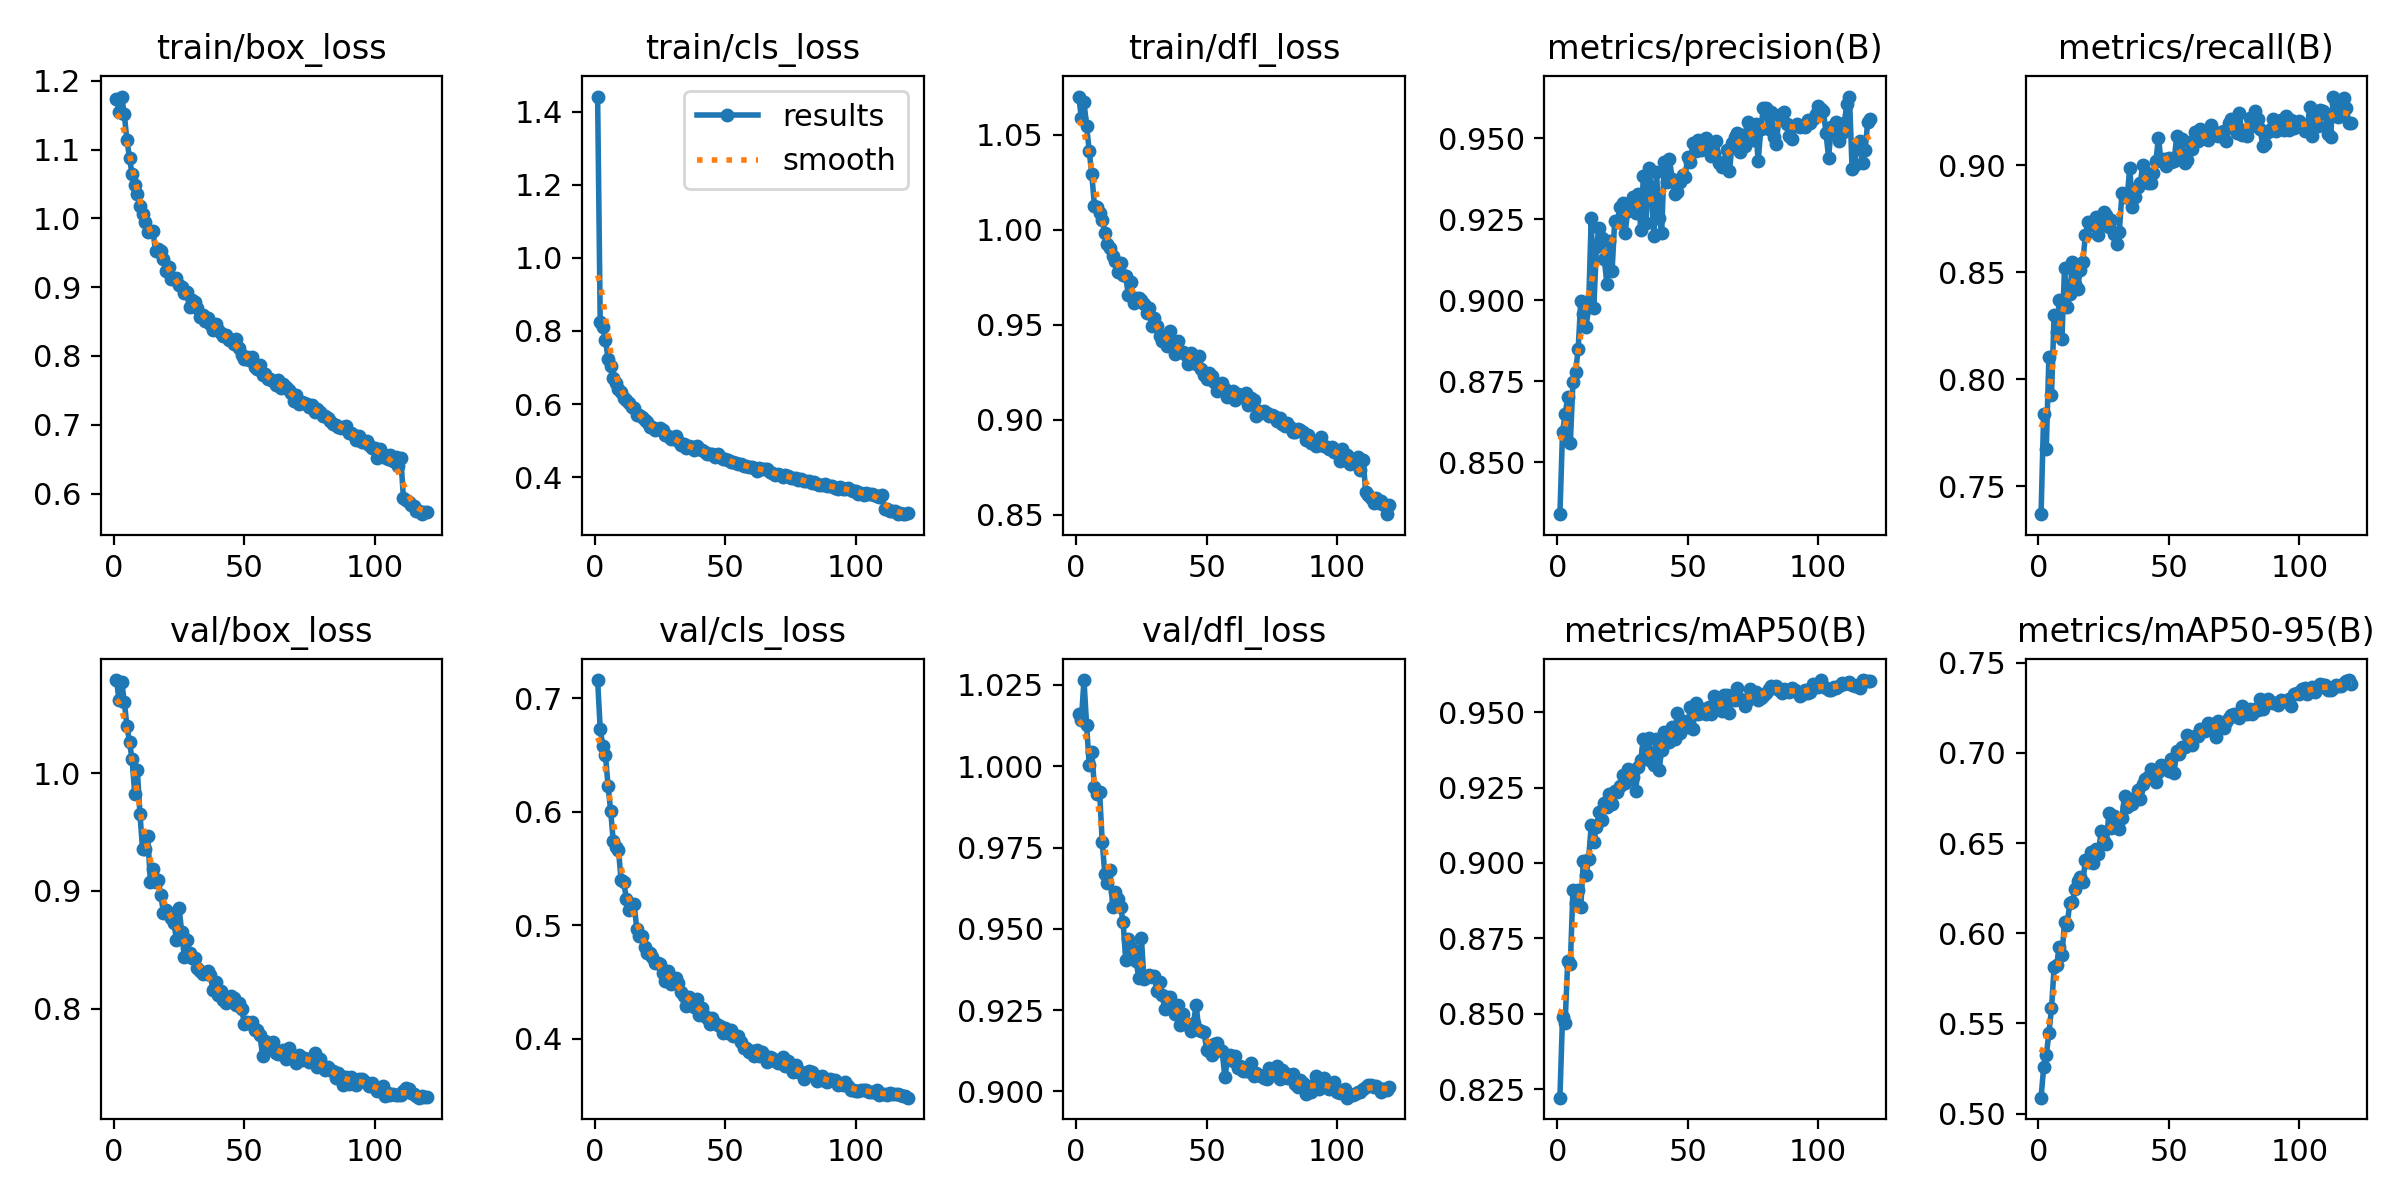

In [ ]:
# if you experience 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968' error, run code below 👇

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!cp -r /content/runs/* /content/drive/MyDrive/Стажировка/runs_120e

cp: cannot create directory '/content/drive/MyDrive/UAI/Стажировка/runs_120e': No such file or directory


In [ ]:
!zip -r runs.zip /content/runs/*

In [ ]:
from google.colab import files

files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
from PIL import Image


model = YOLO('/content/drive/MyDrive/UAI/Стажировка/best.pt')

In [ ]:
model('/content/drive/MyDrive/UAI/Стажировка/Helmets_rdy/test/images/104_jpg.rf.648dd00564583de6aaa8f49ad6ef6110.jpg')

In [ ]:
from glob import glob

def get_file_paths(folder):

    '''
    Функция для получения списка файлов в папке с путями к ним
    Args:
        folder - адрес папки
    Return:
        список файлов с путями
    '''

    return glob(folder, recursive=True)

In [ ]:
src = get_file_paths('/content/drive/MyDrive/UAI/Стажировка/Helmets_rdy/test/images'+ '/**' + '/*.jpg')

In [ ]:
pred = model.predict(
        source = src[:10],
        show=False,
        imgsz=640,
        show_labels=True,
        save=True,
        name='/content/predict',
        conf=0.5,
        )


0: 640x640 1 NO-Hardhat, 1 Person, 1: 640x640 1 Hardhat, 1 Person, 2: 640x640 1 Hardhat, 2 Persons, 3: 640x640 1 Hardhat, 1 NO-Hardhat, 1 Person, 4: 640x640 1 Hardhat, 1 Person, 5: 640x640 1 Hardhat, 1 Person, 6: 640x640 1 Hardhat, 1 Person, 7: 640x640 1 Person, 8: 640x640 1 Hardhat, 2 NO-Hardhats, 3 Persons, 9: 640x640 1 Hardhat, 1 NO-Hardhat, 1 Person, 202.4ms
Speed: 3.2ms preprocess, 20.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/predict4


In [ ]:
from PIL import Image
rdy = get_file_paths('/content/predict'+'4'+ '/**' + '/*.jpg')
for s in rdy:
  img = Image.open(s)
  display(img)

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

In [ ]:
# Загрузка весов в проект
from roboflow import Roboflow
import ultralytics

rf = Roboflow(api_key='zkBUPh2jfwTn9Jl7nC8E')
project = rf.workspace().project('helmets-on-persons-heads')
project.version(1).deploy(model_type='yolov8', model_path='/content/drive/MyDrive/Стажировка')

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/aisl/helmets-on-persons-heads/1
Share your model with the world at: https://universe.roboflow.com/aisl/helmets-on-persons-heads/model/1


In [ ]:
# Стирает runs
!rm -rf /content/runs

### Тестируем и оцениваем модель, вывод в тестовом режиме

In [6]:
from ultralytics import YOLO

best_model = YOLO("/content/drive/MyDrive/Стажировка/weights/best_120e.pt")

In [8]:
metrics = best_model.val(data=f'{LOCATION}/data.yaml')

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]
val: Scanning /content/Helmets-on-persons-heads-cn3-1/valid/labels... 499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<00:00, 1231.43it/s]

val: New cache created: /content/Helmets-on-persons-heads-cn3-1/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]


                   all        499       1968      0.316      0.312      0.328      0.249
               Hardhat        499        509      0.945      0.935       0.96       0.73
                  Mask        499        518          0          0          0          0
            NO-Hardhat        499        941    0.00401    0.00213     0.0242     0.0159
Speed: 1.0ms preprocess, 9.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val2


In [9]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{LOCATION}/test/images",
    annotations_directory_path=f"{LOCATION}/test/labels",
    data_yaml_path=f"{LOCATION}/data.yaml",
    force_masks=False
)

In [10]:
print(ds.classes)

['Hardhat', 'NO-Hardhat', 'Person']


In [11]:
import supervision as sv

CONFIDENCE_TRESHOLD = 0.4

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections.from_ultralytics(result)
    predictions[image_name] = detections


0: 640x640 1 Hardhat, 3 NO-Hardhats, 3 Persons, 16.4ms
Speed: 3.1ms preprocess, 16.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NO-Hardhat, 1 Person, 35.0ms
Speed: 13.4ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 NO-Hardhats, 2 Persons, 34.4ms
Speed: 2.3ms preprocess, 34.4ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Hardhats, 2 Persons, 54.5ms
Speed: 1.8ms preprocess, 54.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Hardhat, 1 Person, 21.9ms
Speed: 1.7ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Hardhat, 1 Person, 35.9ms
Speed: 4.2ms preprocess, 35.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 NO-Hardhats, 2 Persons, 17.1ms
Speed: 1.7ms preprocess, 17.1ms inference, 12.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640

In [13]:
print(predictions['/content/Helmets-on-persons-heads-cn3-1/test/images/1c021af8-0060989_jpg.rf.e0ddb1059bf5904b98c7f4275134cf20.jpg'])

Detections(xyxy=array([[     495.37,      346.12,      569.94,      473.63],
       [     549.74,      346.15,      568.92,      373.56]], dtype=float32), mask=None, confidence=array([    0.90886,     0.88934], dtype=float32), class_id=array([5, 2]), tracker_id=None)


In [14]:
import random
random.seed(10)

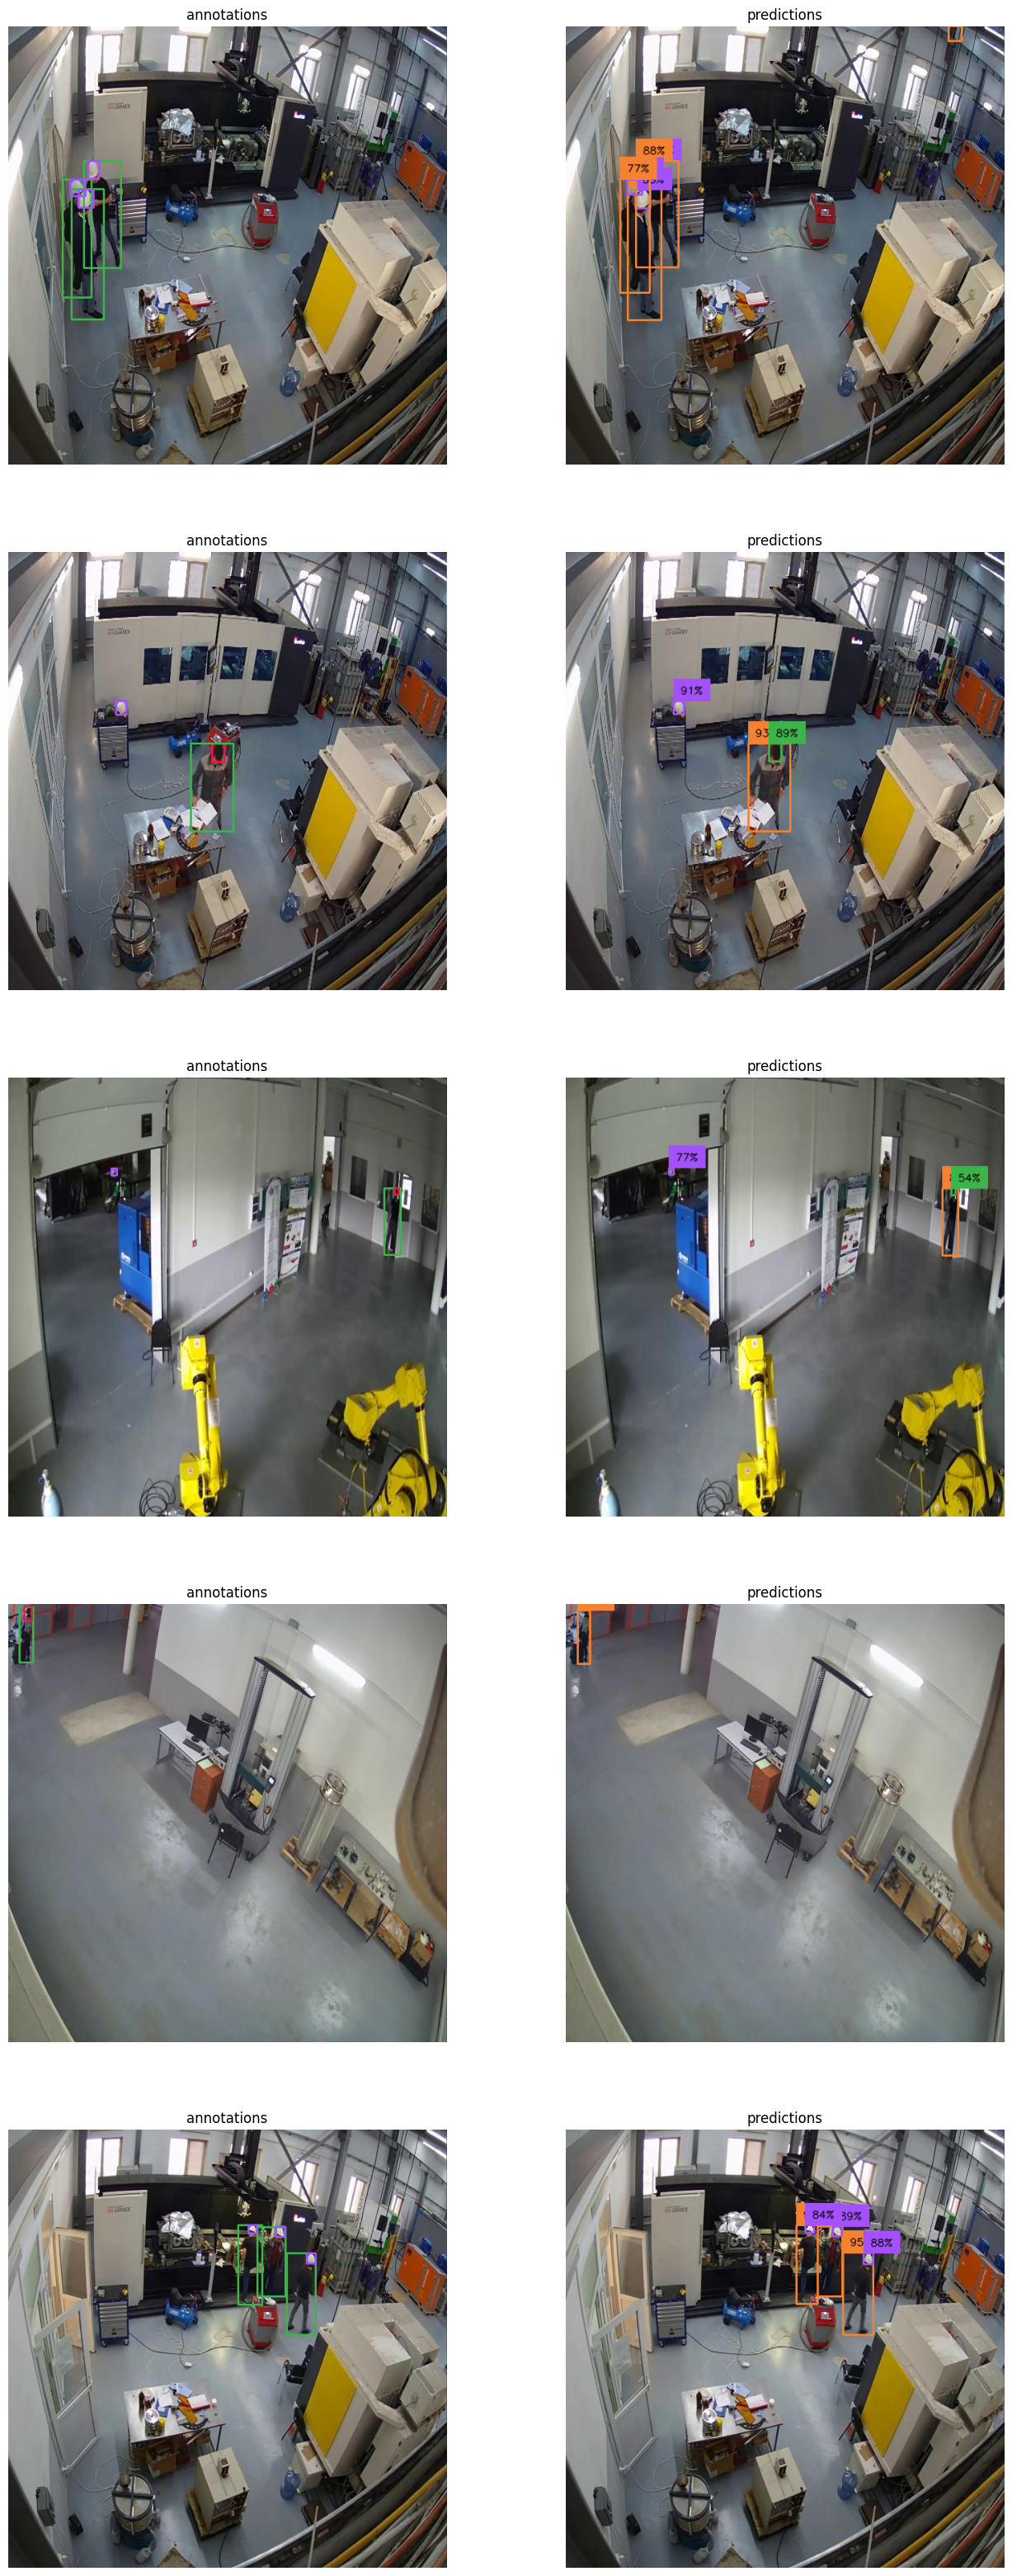

In [15]:
import matplotlib.pylab as pylab
import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []
labels = []

'''
labels = [
	f"{ds.classes[class_id]} {confidence:0.2f}"
	for _, _, confidence, class_id, _
	in detections
]
'''

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')

    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        labels = [f"{confidence:.0%}" for _, _, confidence, _, _	in predictions[key]],
        skip_label=False
    )
    images.append(frame_with_predictions)
    titles.append('predictions')


%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 8, n * 8))

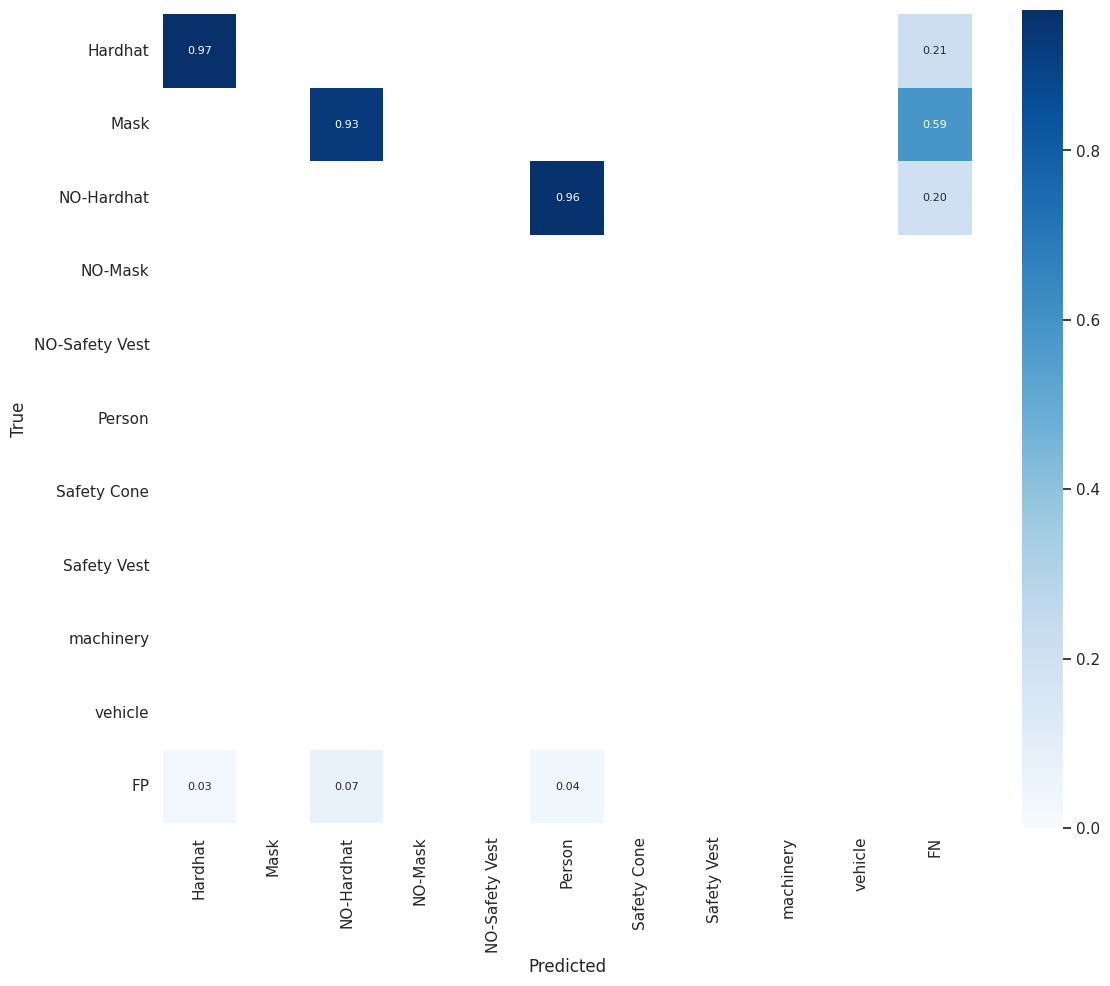

In [19]:
import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

# Подправим классы
ds.classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=ds.classes)